Collab Link - https://colab.research.google.com/drive/1HVyjQxZAljR7bYiEicDRKDQcbTus9BUr?usp=sharing

**Project on Car Sales**

Steps - 
1. Data Pre-Processing
2. Feature Encoding, Maping & Dummies
3. Train Test Split
4. Normalising Series
5. Recursive Feature Elimination
6. Linear Regression Model
7. Variance Inflation Factor
8. R-squared, Mean Absolute Error & Mean Squared Error & Mean Squared Log Error
9. Residual Analysis & Homoscedasticity
10. Predicting on Test Set & Model Efficiency Test

CSV Data Link - https://drive.google.com/file/d/1FjR6843kA4ClGNUmNSJpM6pYRovCBNo6/view?usp=sharing

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars_df = pd.read_csv("car-prices.csv")

cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Reassigning names for Car Companies & Droping Car Name column

In [25]:
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']], index = cars_df.index)
cars_df['car_company'] = car_companies
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)

cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Selecting Numeric Part of Dataframe

In [26]:
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])
cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)

cars_numeric_df.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Applying Map to the CylinderNumber & Door Number Column

In [27]:
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}

def num_map(series):
    return series.map(words_dict)

cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber', 'doornumber']].apply(num_map, axis = 1)

cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Getting Dummies for the Carbody Column

In [28]:
car_body_dummies = pd.get_dummies(cars_df['carbody'], dtype = int)
car_body_dummies_2 = pd.get_dummies(cars_df['carbody'], drop_first = True, dtype = int)

car_body_dummies_2.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


Categorically diffrentiating the dataframe & Concating the Whole DataFrame, to move forward with the Model

In [29]:
cars_categorical_df = cars_df.select_dtypes(include = ['object'])
cars_dummies_df = pd.get_dummies(cars_categorical_df, drop_first = True, dtype = int)
cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)
cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)
cars_df.drop('car_ID', axis = 1, inplace = True)

cars_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cars_df, test_size = 0.3, random_state = 42)

features = list(cars_df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

Normalising the Series

In [33]:
def standard_norm(series):
  series_mean = series.mean()
  series_std = series.std()
  new_series = (series - series_mean) / series_std
  return new_series

X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)


Getting the Highly Correlated Features by a margin of 0.5

In [34]:
major_features = {}
for f in features:
  corr_coef = np.corrcoef(cars_df['price'], cars_df[f])[0, 1]
  if (corr_coef >= 0.5) or (corr_coef <= -0.5):
    major_features[f] = corr_coef

Starting Recursive Feature Elimination with 5 features

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

skl_lin_reg = LinearRegression()
rfe = RFE(skl_lin_reg,n_features_to_select=5)
rfe.fit(X_train[major_features.keys()], y_train)

print(rfe.ranking_) 

[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1]


Building LinearRegression Model by statsmodel.api OLS

In [36]:
import statsmodels.api as sm  
rfe_features = X_train[major_features.keys()].columns[rfe.support_]
X_train_rfe = X_train[rfe_features]
X_train_rfe = sm.add_constant(X_train_rfe)
sm_lin_reg = sm.OLS(y_train, X_train_rfe).fit()   

sm_lin_reg.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.00e-58
Time:                        02:20:33   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.436e+04    427.391     33.589      0.000    1.35e+04    1.52e+04
carwidth           1696.2271    357.627      4.743      0.000     989.044    2403.411
enginesize         2636.6328    497.107      5.304      0.000    1653.638    3619.628
horsepower         2363.8354    445.347      5.308      0.000    1483.193    3244.478
drivewheel_fwd    -2016.6827    599.884     -3.362      0.001   -3202.912    -830.454
car_company_buick  7984.8761   1778.109      4.491      0.000    4468.789    1.15e+04
==============================================================================
Omnibus:                       16.079   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.325
Skew:                           0.652   Prob(JB):                     2.34e-05
Kurtosis:                       4.371   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking for Variance Inflation Factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.18
3,horsepower,3.35
0,const,3.11
1,carwidth,2.16
4,drivewheel_fwd,1.49
5,car_company_buick,1.46


appling LR Model using sklearn

In [38]:
X_train_final = X_train_rfe.drop(labels=['const'],axis=1)
lr_final = LinearRegression()
lr_final.fit(X_train_final,y_train)
y_train_pred = lr_final.predict(X_train_final)
y_train_pred

array([11614.67148027, 20805.93850454,  9737.85451687,  6747.05425956,
       16681.44092811,  6824.7936787 , 19864.14770684, 10931.14320868,
        7165.9828108 , 15535.30134   ,  9528.31159981,  6447.90534522,
       15156.91804226, 11332.57459877, 10367.81992176, 18744.69666708,
        6667.01482563,  8574.49241448,  6073.31702654, 15535.30134   ,
       17995.1078805 , 18723.83472447, 18395.58734129,  6667.01482563,
       12312.66565663,  6582.36216355, 23784.75672373, 10525.16960491,
        6266.36591107,  6747.05425956, 17193.09859032, 11145.93495064,
        6073.31702654, 12605.69802981,  8928.65351476,  6824.7936787 ,
       11946.28364492, 18786.0198695 ,  8871.70781821, 17369.38919957,
        8574.49241448, 23784.75672373, 16673.53775512,  9282.78821791,
       15792.06125757,  5060.12227179, 15274.10217466,  7840.3016468 ,
       15274.10217466, 11299.47090189, 11946.28364492, 11145.93495064,
        6073.31702654,  5693.54707529, 15865.04439192, 13387.90249977,
      

Checking R-squared, Mean Absolute Error & Mean Squared Error & Mean Squared Log Error

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

print("R-squared value:",r2_score(y_train,y_train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,y_train_pred))
print("Mean Absolute Error:",mean_absolute_error(y_train,y_train_pred))
print("Mean-Squared Log Error :",mean_squared_log_error(y_train,y_train_pred))

R-squared value: 0.868039301033769
Mean Squared Error: 8042954.083420408
Mean Absolute Error: 2080.493944076901
Mean-Squared Log Error : 0.03430939459516451


Residual Analysis by Histogram - Train Set

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


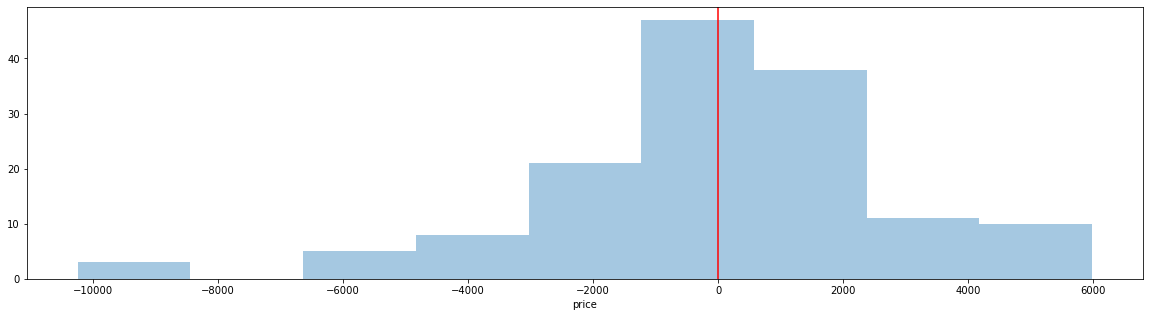

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = y_train_pred-y_train

plt.figure(figsize=(20,5))
sns.distplot(errors,bins='sturges',kde=False)
plt.axvline(np.mean(errors),color='red')
plt.show()


Checking for Predict & Real Data - Homoscedasticity

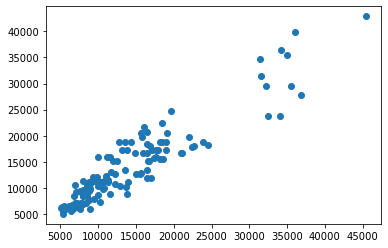

In [41]:
plt.scatter(y_train,y_train_pred)

Applying on Test Set


In [20]:
X_test = X_test[X_train_final.columns]
y_test_pred = lr_final.predict(X_test)

print("R-squared value:",r2_score(y_test,y_test_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_test_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_test_pred))

R-squared value: 0.7905175277548843
Mean Squared Error: 14513862.919457005
Mean Absolute Error: 2566.662733731332


Residual Analysis by Histogram - Test Set

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


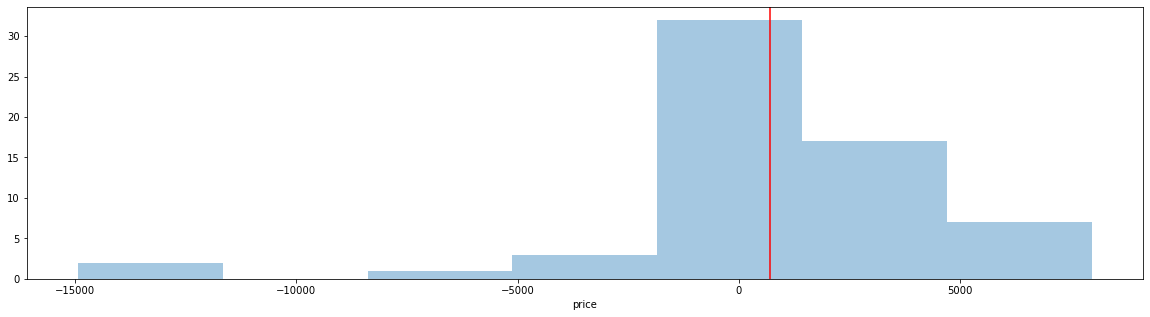

In [21]:
errors_test = y_test_pred-y_test

plt.figure(figsize=(20,5))
sns.distplot(errors_test,bins='sturges',kde=False)
plt.axvline(np.mean(errors_test),color='red')
plt.show()

Checking for Predict & Real Data - Homoscedasticity

Model Efficency Test

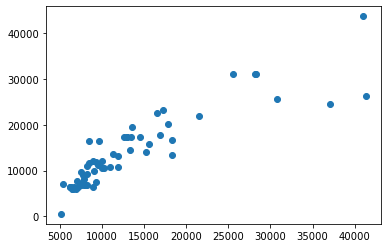

In [42]:
plt.scatter(y_test,y_test_pred)

## Code by Paarth Parikh

Project on Car Sales Analysis & Prediction